In [40]:
'''Zomato has an average of 17.5 million monthly transacting customers for its food delivery business 
average monthly active food delivery restaurant partners on Zomato's platform have also increased by 
8.7% year-on-year, from 208,000 to 226,000.You are working in a data-driven role at Zomato. You have a 
dataset of customers. As a data professional, you need to analyze the data, perform EDA (Exploratory 
Data Analysis) and visualization, and answer the following questions:

Questions:
1) What type of restaurant do the majority of customers order from?
2 How many votes has each type of restaurant received from customers?
3) What are the ratings that the majority of restaurants have received?
4)Zomato has observed that most couples order most of their food online. What is their 
average spending on each order?
5) Which mode (online or offline) has received the maximum rating?
6) Which type of restaurant received more offline orders, so that Zomato can provide those 
customers with some good offers?
'''

"Zomato has an average of 17.5 million monthly transacting customers for its food delivery business \naverage monthly active food delivery restaurant partners on Zomato's platform have also increased by \n8.7% year-on-year, from 208,000 to 226,000.You are working in a data-driven role at Zomato. You have a \ndataset of customers. As a data professional, you need to analyze the data, perform EDA (Exploratory \nData Analysis) and visualization, and answer the following questions:\n\nQuestions:\n1) What type of restaurant do the majority of customers order from?\n2 How many votes has each type of restaurant received from customers?\n3) What are the ratings that the majority of restaurants have received?\n4)Zomato has observed that most couples order most of their food online. What is their \naverage spending on each order?\n5) Which mode (online or offline) has received the maximum rating?\n6) Which type of restaurant received more offline orders, so that Zomato can provide those \ncustom

In [1]:
import pandas as pd
import numpy as np

C:\Users\admin\AppData\Local\Temp\ipykernel_2520\2162656668.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
Data = pd.read_csv(r'Zomato data .csv')

In [3]:
Data

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [5]:
# Converting rate column to float & remove denominator

def handle(value):
    value = str(value).split('/')
    value= value[0]
    return float(value)

Data['rate'] = Data['rate'].apply(handle)
Data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


The Data is cleaned & ready to perform visulizations.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

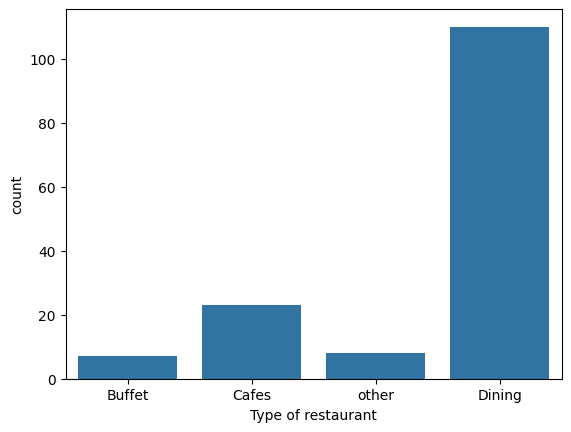

In [8]:
#  What type of restaurant do the majority of customers order from?

sns.countplot(x=Data['listed_in(type)'])
plt.xlabel("Type of restaurant")
plt.show()

Conclution : The majority of restaurants fall into the dining category.
    Dining restaurants are preferred by a lerger number of individuals

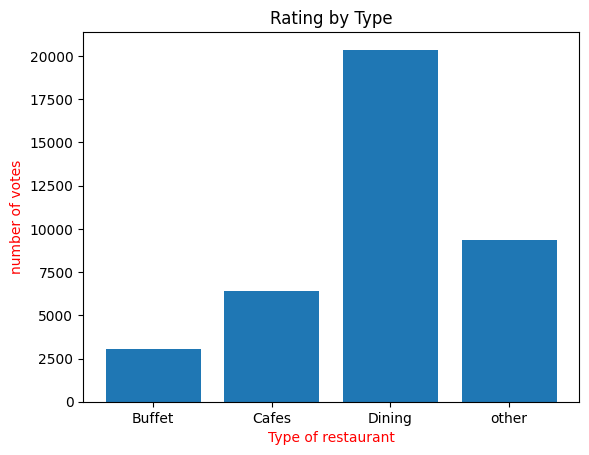

In [39]:
# How many votes has each type of restaurant received from customers?

group = Data.groupby('listed_in(type)')['votes'].sum()
plt.bar(group.index,group.values)
plt.title("Rating by Type")
plt.xlabel("Type of restaurant",color = 'red')
plt.ylabel("number of votes",color = 'red')

plt.show()

The mejority of restaurant recieved rating is dining.

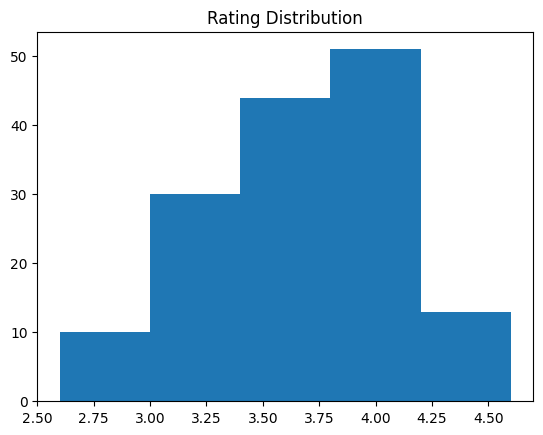

In [14]:
# What are the ratings that the majority of restaurants have received?

plt.hist(Data['rate'], bins = 5)
plt.title('Rating Distribution')
plt.show()

Most restaurants has recieved rating between 3.5 to 4.25.


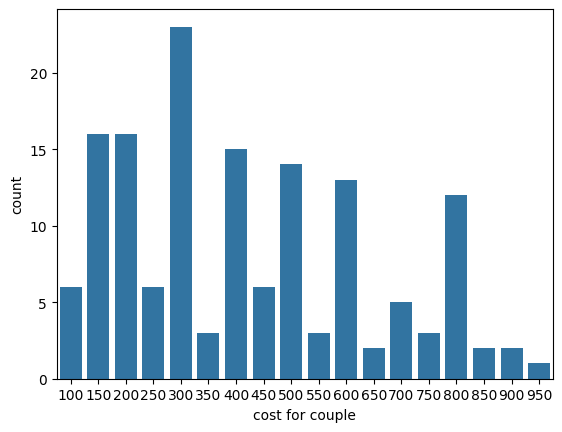

In [17]:
'''Zomato has observed that most couples order most of their food online. What is their 
average spending on each order?'''


couple_data = Data['approx_cost(for two people)']
sns.countplot(x=couple_data)
plt.xlabel('cost for couple')
plt.show()

Maximum number of couples prefer restaurants with an approximate cost of 300 rs.

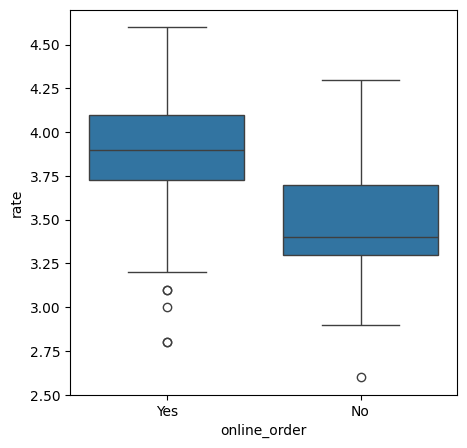

In [28]:
# Which mode has received the maximum rating?

plt.figure(figsize=(5,5))
sns.boxplot(x='online_order', y='rate',data=Data)
plt.show()

whether online orders recieved more rating than offline, the average of online order rating is 3.75 to 4.00 which is higher then average offline order rating.

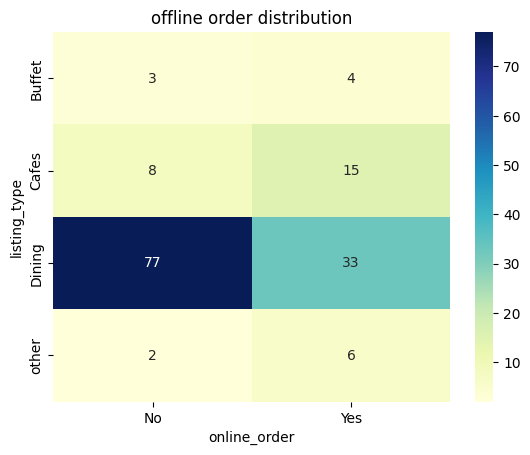

In [38]:
'''Which type of restaurant received more offline orders, so that Zomato can provide those 
customers with some good offers?'''

table = Data.pivot_table(index='listed_in(type)', columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(table,annot=True, cmap='YlGnBu',fmt='d')
plt.xlabel('online_order')
plt.ylabel('listing_type')
plt.title("offline order distribution")
plt.show()

Dining restaurants primerily accept offline orders, whereas cafes primerily recived online orders.
This sugggest that customers prefer to place orders in person at restaurants, but prefer online ordering at cafes.